### Second Project

In [39]:
using Plots, ROCAnalysis, GLM, MLBase, Lathe, Distributions, LaTeXStrings, CSV, DataFrames, StatsBase, Missings, XLSX, Dates, HTTP
using IJulia: readprompt

In [71]:
dff = DataFrame(XLSX.readtable("crypto_currency.xlsx", "Sheet1")...)

,name,ticket,market cap,last price($)
,Any,Any,Any,Any
1,Bitcoin,BTC,750B,39K
2,Ethereum,ETH,360B,3K
3,Ripple,XRP,50B,0.7
4,Solana,SOL,34B,100
5,Terra,LUNA,32B,91
6,Cardano,ADA,30B,0.9
7,Avalanche,AVAX,20B,73
8,Polkadot,DOT,19B,19
9,Dogecoin,DOGE,18B,0.13


In [42]:
dff.ticket

10-element Vector{Any}:
 "BTC"
 "ETH"
 "XRP"
 "SOL"
 "LUNA"
 "ADA"
 "AVAX"
 "DOT"
 "DOGE"
 "MATIC"

In [110]:
selected_rows = findall(x->x ∈ sort(dff."market cap", rev=true)[1:5], dff."market cap")
top_five=df[selected_rows,:]
for i in top_five."last price(\$)"
    if typeof(i) == String && contains(i, "K") == true
        replace!(top_five."last price(\$)", i=>parse(Int, chop(i))*1000)
    end
end
top_five

,name,ticket,market cap,last price($)
,Any,Any,Any,Any
1,Bitcoin,BTC,750B,39K
2,Ethereum,ETH,360B,3K
3,Ripple,XRP,50B,0.7
4,Solana,SOL,34B,100
5,Terra,LUNA,32B,91


##### *sclaing data*
$$
x := \frac{x - \mu}{\sigma}
$$

##### *Functions*

In [68]:
# removing nulls and substituing them with the average value
function string_remover(df :: DataFrame, col_ :: Integer)
    list_ = [0.0 for i in 1:366]
    sum=0.0
    tot=0.0
    for (n, value) in enumerate(df[!, col_])
        if value != "null"
            list_[n]=parse(Float64, value) 
            sum += list_[n]
            tot += 1  
        end
    end
    avg = sum/tot
    list_[findall(x->x==0.0, list_)] .= avg
    return list_
end
# calculating return values
function return_cal(df :: DataFrame)
    r_list = []
    for i in 2:11
        temp=[]
        for j in 1:365
            r = (df[j,i] - df[j+1,i])/ df[j+1,i]
            push!(temp, r)
        end
        push!(r_list, temp)
    end
    return r_list
end
# calculating the Cumulative return 
function cumulative_return(r_list)
    cu_r_list = []
    for i in 1:10
        multi=1
        for j in 1:length(r_list[i])
            multi *= (r_list[i][j] + 1)
        end
        push!(cu_r_list, multi - 1)
    end
    return cu_r_list
end

cumulative_return (generic function with 1 method)

### Q1

In [49]:
coin_symbols = ["BTC", "ETH", "XRP", "SOL", "LUNA", "ADA", "AVAX", "DOT", "DOGE", "MATIC" ]
start_date = "2021-01-01"
end_date = "2022-01-01"

"2022-01-01"

In [54]:
api_key = "052E2ECA-27A4-4E59-AD69-DAFDD269B5BE"

api_address = "https://rest.coinapi.io/v1/exchangerate/"
api_params = "/USD/history?period_id=1DAY&limit=2000&output_format=csv"

api_time(sdate, edate) = "&time_start=$(sdate)&time_end=$(edate)"

for symbol in coin_symbols
    write("$symbol.csv", HTTP.get(
        api_address * symbol * api_params * api_time(start_date, end_date),
        ["X-CoinAPI-Key" => api_key]).body)
end

In [64]:
df = DataFrame("Date" => reverse!(collect(Date(2021,01,01):Day(1):Date(2022,01,01))),
     "BTC" => reverse!(vec(convert(Array, select!(CSV.read("BTC.csv", DataFrame), "rate_close")))),
     "ETH"=> reverse!(vec(convert(Array, select!(CSV.read("ETH.csv", DataFrame), "rate_close")))), 
     "XRP"=> reverse!(vec(convert(Array, select!(CSV.read("XRP.csv", DataFrame), "rate_close")))),
     "SOL"=> reverse!(vec(convert(Array, select!(CSV.read("SOL.csv", DataFrame), "rate_close")))), 
     "LUNA"=> reverse!(vec(convert(Array, select!(CSV.read("LUNA.csv", DataFrame), "rate_close")))),
     "ADA"=> reverse!(vec(convert(Array, select!(CSV.read("ADA.csv", DataFrame), "rate_close")))), 
     "AVAX"=> reverse!(vec(convert(Array, select!(CSV.read("AVAX.csv", DataFrame), "rate_close")))), 
     "DOT"=> reverse!(vec(convert(Array, select!(CSV.read("DOT.csv", DataFrame), "rate_close")))),
     "DOGE"=> reverse!(vec(convert(Array, select!(CSV.read("DOGE.csv", DataFrame), "rate_close")))), 
     "MATIC"=> reverse!(vec(convert(Array, select!(CSV.read("MATIC.csv", DataFrame), "rate_close")))))

#preprocessing data


,Date,BTC,ETH,XRP,SOL,LUNA,ADA,AVAX,DOT
,Date,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2022-01-01,46181.5,3675.38,0.829368,169.98,85.4733,1.30796,109.436,26.6559
2,2021-12-31,46175.7,3675.22,0.829491,169.867,85.4261,1.30615,109.415,26.6477
3,2021-12-30,47144.6,3711.54,0.838914,172.593,84.7173,1.35927,101.726,27.5511
4,2021-12-29,46450.4,3628.43,0.816511,170.774,84.1641,1.33047,103.033,26.741
5,2021-12-28,47565.5,3797.55,0.851919,177.358,85.3572,1.40073,107.135,27.8798
6,2021-12-27,50702.3,4041.64,0.926585,195.661,90.891,1.51408,113.752,30.94
7,2021-12-26,50814.2,4066.1,0.920693,198.048,99.7597,1.45519,115.186,31.3552
8,2021-12-25,50435.6,4095.73,0.925013,193.072,98.2836,1.45388,114.931,28.8548
9,2021-12-24,50821.5,4047.17,0.910808,190.375,96.0153,1.39114,115.038,28.158


In [ ]:
# Polkadot_ = string_remover(df, 9)
# # deleting the previous column and adding the new one
# dff = select!(df, Not(:Polkadot))
# #insert!(df, 9, Polkadot_, :Polkadot)
# dff.Polkadot = Polkadot_

In [ ]:
# for i in 2:10
#     replace!(x -> x == "null" ? 0.0 : x , df[!,i])
# end

In [65]:
for i in 2:11
    replace!(x -> (x - mean(df[!,i]))/var(df[!,i]), df[!,i])
end

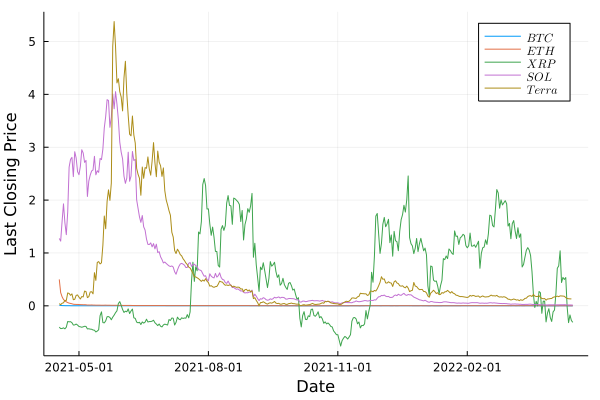

In [66]:
dr = Date(2021,04,17):Day(1):Date(2022,04,17)
plot()
for i in 2:5
    name_ = names(df)[i]
    plot!(reverse!(collect(dr)),df[!,i], label=L"%$name_")
end
plot!(reverse!(collect(dr))[2:366],df[2:366,6], label=L"Terra", xlabel= "Date", ylabel= "Last Closing Price")

### Q2

#### Formula of cryptocurrencies returns:
$$
return = \frac{closing\ price(t) - closing\ price(t-1)}{closing\ price(t-1)}
$$


In [69]:
r_list=return_cal(df)
cu_r_list = cumulative_return(r_list)

10-element Vector{Any}:
 -1.001056730521064
 -0.998296199526297
 -0.2231388725081389
 -0.9881843388264515
  2.058438115812508
 -0.25867608443852574
 -0.9788675429192087
 -1.0031343355069327
  5.305070491082108
 -6.336915358849395

In [72]:
# The maximum cumulative return of all cryptocurrencies
index_ = findall(x->x == maximum(cu_r_list), cu_r_list) .+1
println("The most profitable  cryptocurrency is : $(names(dff)[index_])")

LoadError: BoundsError: attempt to access 4-element Vector{String} at index [[10]]

### Q2

In [165]:
df[188, 1]

2021-10-12

In [33]:
r_df = DataFrame("Date" => reverse!(collect(Date(2021,10,12):Day(1):Date(2022,04,17))),
    "BTC" => first(r_list[1],188),
    "ETH" => first(r_list[2],188),
    "XRP" => first(r_list[3],188),
    "SOL" => first(r_list[4],188),
    "LUNA"=> first(r_list[5],188),
    "ADA" => first(r_list[6],188),
    "AVAX" => first(r_list[7],188),
    "DOT" => first(r_list[8],188),
    "DOGE" => first(r_list[9],188),
    "MATIC" => first(r_list[10],188),)

,Date,BTC,ETH,XRP,SOL,LUNA,ADA
,Date,Any,Any,Any,Any,Any,Any
1,2022-04-17,0.24484,0.883916,1.25992,0.37768,-5.71268e5,0.234859
2,2022-04-16,0.121599,-0.0740556,0.224763,-0.0968356,-1.19805e-5,0.119907
3,2022-04-15,-0.0347955,-0.060861,-0.221555,-0.040888,3.11794e-5,0.0537987
4,2022-04-14,0.408383,6.76126,0.135537,2.09702,-7.64243e-5,0.16566
5,2022-04-13,-0.138555,-0.81988,0.079063,-0.385585,5.58235e-5,0.0316931
6,2022-04-12,-0.0413809,-0.27099,-0.0132687,-0.501463,3.02773e-5,0.00094062
7,2022-04-11,1.13205,-2.39775,0.606336,-2.36632,-0.000160761,0.304456
8,2022-04-10,0.405662,-0.342524,0.134471,-0.216638,0.000584749,0.081398
9,2022-04-09,-0.118645,0.667928,-0.0112532,0.718697,-0.000597607,0.00402732


In [34]:
positive_returns = []
negative_returns = []
for i in 2:11
    push!(positive_returns, df[findall(x->x<0 , r_df[!,i]), i])
    push!(negative_returns, df[findall(x->x>0 , r_df[!,i]), i])
end
println("number of positive returns are:")
for i in 1:10
    println("$(length(positive_returns[i]))")
end
println("number of negative returns are:")
for i in 1:10
    println("$(length(negative_returns[i]))")
end

number of positive returns are:
102
109
100
109
92
94
97
95
99
138
number of negative returns are:
86
79
88
79
96
94
91
93
89
50


In [35]:
positive_CuR = cumulative_return(positive_returns)
negative_CuR = cumulative_return(negative_returns)
println("altcoins cumulative return when the bitcoin daily return is pasitive:")
for i in 1:10
    println("$(positive_CuR[i])")
end
println("altcoins cumulative return when the bitcoin daily return is negative:")
for i in 1:10
    println("$(negative_CuR[i])")
end

altcoins cumulative return when the bitcoin daily return is pasitive:
0.002386521923946505
0.0465538379536905
9.617246412112656e7
4.283235951205521
-851.9054726713999
14.595537319693044
127.41507796154664
105.9319087764278
4.050709446349569e26
59.896068501064256
altcoins cumulative return when the bitcoin daily return is negative:
0.0018992423989891982
0.04195845777671048
-2.2946590826637767e7
2.5312396612893875
0.13551411561882443
-0.9999999999814685
115.54838718681665
-503.4631243692669
2.947232884126173e26
12.578940475597795


### Q3